In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

font_location = 'C:/Windows/Fonts/gulim.ttc'
font_name = font_manager.FontProperties(fname = font_location).get_name()
rc('font', family=font_name)

import warnings
warnings.filterwarnings('ignore')

import datetime as dt
import seaborn as sns

In [2]:
%matplotlib inline
plt.style.use('ggplot')

# 소매업태별 분기별 계절조정지수

소매업태별_분기별판매액 데이터를 불러옵니다. 출처는 한국은행경제통계시스템 입니다.

계절성이 조정된 지수입니다.

기준은 2015년 매출 실적입니다(2015년 매출실적=100)


고려한 업태는 다음과 같습니다.

'총지수','백화점','대형마트','면세점','슈퍼마켓 및 잡화점','편의점','승용차 및 연료 소매점','전문소매점','무점포 소매'


In [3]:
data = pd.read_excel('소매업태별_분기별판매액계절조정지수_2019_2020.xlsx')
data.set_index(keys='시점', drop=True, inplace=True)

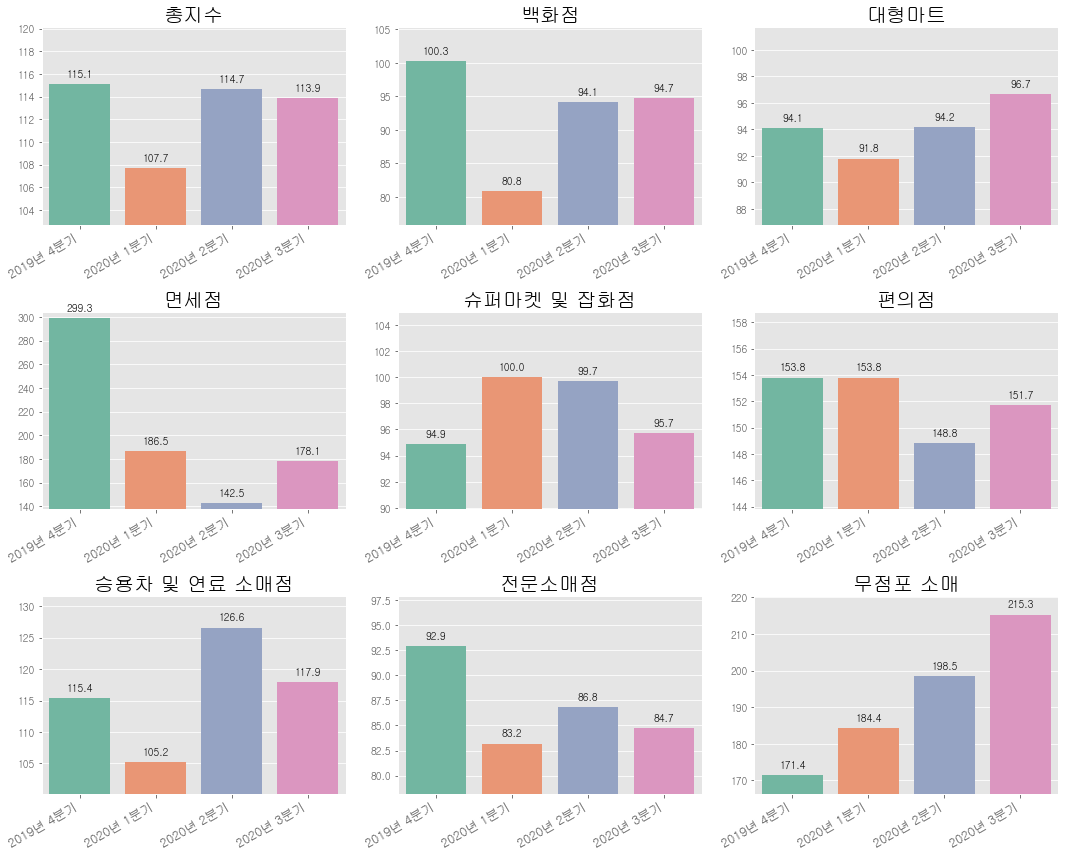

In [4]:
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.ravel()

for i in range(len(axes)):
    bar=sns.barplot(data.index[3:], data.iloc[3:, i], ax=axes[i], palette='Set2')
    for p in bar.patches:
        bar.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
    axes[i].set_title(data.columns[i], fontsize=20)
    plt.setp(axes[i].get_xticklabels(), rotation=30, ha='right', fontsize=12.5)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    axes[i].set_ylim((np.min(data.iloc[3:, i]) - 5, np.max(data.iloc[3:, i]) + 5))
    
plt.tight_layout()
plt.show()


총지수를 보면 코로나 초기 타격을 받았다가 다시 회복한 것을 알 수 있습니다.

업태별 상황을 보도록 하겠씁니다.

#### 백화점:
백화점의 경우 코로나 초기 심각한 타격을 받았습니다.그러나 금방 회복하였습니다.

#### 대형마트: 
대형마트의 경우 코로나 이전부터 서서히 감소하는 추세였습니다. 오히려 코로나 이후 감소량이 적어진 것을 확인할 수 있습니다.

#### 면세점: 
면세점은 코로나에 가장 심각한 타격을 입었습니다. 코로나 이전까지 급격한 상승폭을 보였으나 코로나 타격 이후 회복을 못하고 있습니다.

#### 슈퍼마켓 및 잡화점:
슈퍼마켓 및 잡화점은 코로나 이후 오히려 호황이었습니다. 5월 이후 조금씩 감소하였으나 최근 다시 회복세를 보이고 있습니다.

#### 편의점: 
편의점 같은 경우 코로나에 타격을 받았다가 회복 중인 것으로 보입니다. 다만 8,9월 매출이 하락하는 모양을 보입니다.

#### 승용차 및 연료 소매점:
승용차 및 연료 소매점(주유소 등)은 2월에 잠시 주춤하였으나 빠르게 회복하였습니다.

#### 전문소매점: 
전문소매점(가전, 가구, 의류 등)의 경우 코로나 타격을 받았으나 어느정도 회복하였습니다.

#### 무점포 소매:
가장 도드라지는 것은 무점포 소매(온라인 쇼핑몰 등) 입니다. 

코로나 이전부터 꾸준히 상승세를 보였고 코로나 이후 오히려 더 높은 성장세를 보입니다.무점포 소매의 성장에는 언택트 트렌드와 
사회적 거리두기가 영향을 준것으로 보입니다.

# 소매업태별 월별 계절조정지수

소매업태별 월별 판매액 데이터도 확인합니다. 출처는 한국은행경제통계시스템 입니다.

계절성이 조정된 지수입니다.

기준은 2015년 매출 실적입니다(2015년 매출실적=100)


In [5]:
stores= pd.read_excel('소매업태별_판매액계절조정지수_201701_202009.xlsx')
stores['시점'] = stores['시점'].astype('str').apply(lambda x: x[:4]+'-'+x[5:8])
stores['시점']=pd.to_datetime(stores['시점']) # 시점을 예쁘게 보기 위한 처리입니다.
stores=stores[12:] # 2017년 데이터 제거
types=list(stores.columns)[1:10] # 업태 종류입니다.

In [6]:
stores.head()

,시점,총지수,백화점,대형마트,면세점,슈퍼마켓 및 잡화점,편의점,승용차 및 연료 소매점,전문소매점,무점포 소매
12,2018-01-01,108.8,95.0,98.0,190.3,102.7,140.8,105.2,98.0,137.7
13,2018-02-01,110.3,102.8,98.0,192.1,103.4,140.4,108.3,99.5,142.4
14,2018-03-01,111.4,100.4,99.0,212.8,102.3,144.3,109.5,99.2,141.5
15,2018-04-01,111.2,99.0,98.7,217.7,100.9,142.9,110.0,98.8,144.1
16,2018-05-01,109.9,98.8,96.7,212.1,100.5,141.4,108.7,97.2,143.4


# 트렌드 개별로 확인하기

In [7]:
def make_graph(type):
    plt.figure(figsize=(8, 7))
    j=type
    plt.xticks(rotation=30, ha='right', fontsize =15)
    plt.yticks(fontsize =15)

    plt.plot(np.array(stores[['시점']]),np.array(stores[j]),marker='o', linewidth=2,label=j,color='C2')
    plt.axvline(x=stores['시점'][36],linestyle ='--',color='C0')
    plt.ylim(np.min(np.array(stores[j])) - 15, np.max(np.array(stores[j])) + 15)
    plt.title(j,fontsize=20)
    return plt.show()

빨간 선이 2020년 1월입니다.

우선 총 지수 부터 살펴보겠습니다.



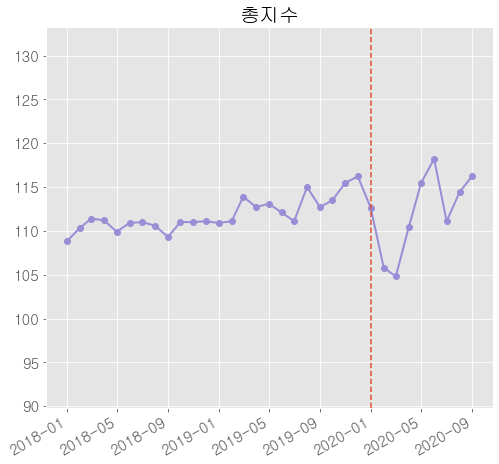

In [8]:
make_graph('총지수')

총 지수를 보면 코로나 초기 타격을 받았다가 다시 회복한 것을 알 수 있습니다.




업태별 상황을 보도록 하겠습니다.

우선 백화점부터 시작합니다.

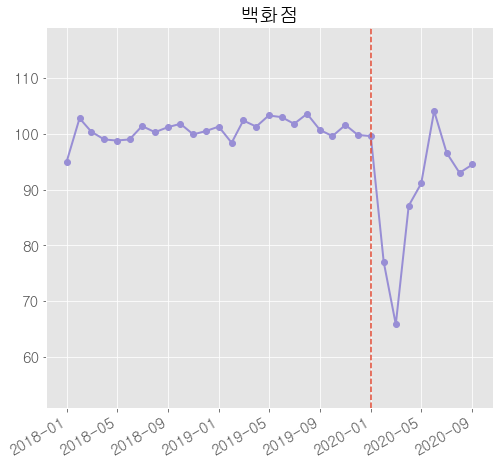

In [9]:
make_graph('백화점')

백화점의 경우 코로나 초기 심각한 타격을 받았습니다.그러나 회복 속도 역시 빨랐습니다.

고가품들의 매출 증가, 판촉행사 등으로 회복한 것으로 판단하였습니다.

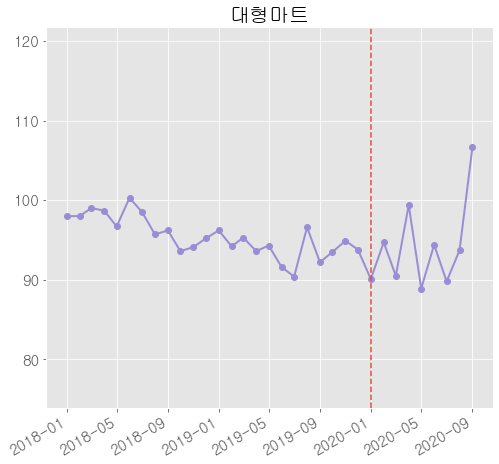

In [10]:
make_graph('대형마트')

대형마트의 경우 코로나 이전부터 서서히 감소하는 추세였습니다. 오히려 코로나 이후 감소량이 적어진 것을 확인할 수 있습니다.

9월에 실적이 많이 증가했습니다. 이는 추석을 '언택트 명절'로 보내면서 고가 선물 판매가 늘어난 게 실적에 반영된 것으로 보입니다.

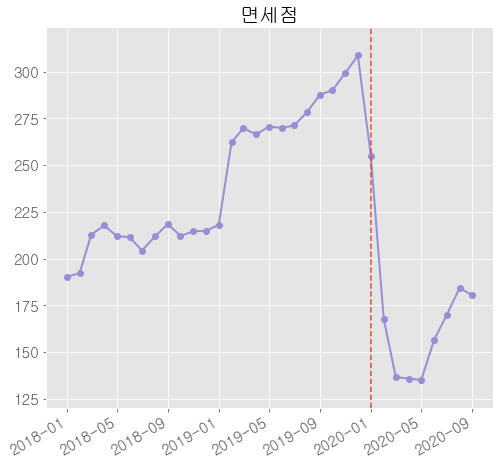

In [11]:
make_graph('면세점')

면세점은 코로나에 가장 심각한 타격을 입었습니다. 코로나 이전까지 급격한 상승폭을 보였으나 코로나 타격 이후 회복을 못하고 있습니다.

해외 관광객들의 감소가 큰 영향을 주었습니다.

In [ ]:
make_graph('슈퍼마켓 및 잡화점')

슈퍼마켓 및 잡화점은 코로나 이후 오히려 호황이었습니다. 대형마트 기피현상으로 인해 반사이익을 보았습니다.

이는 사람들이 집 근처에서 필요한 물품만 빠르게 사려는 심리가 작용했기 때문입니다.

그러나 5월 이후 다른 업태들이 회복함에 따라 매출이 감소하는 것을 확인하였습니다.

최근에는 다시 회복세를 보이고 있습니다.

In [ ]:
make_graph('편의점')

편의점 같은 경우 코로나에 타격을 받았습니다. 대학가, 유흥가의 점포들이 큰 피해를 받았기 때문입니다.

하지만 5월 이후 회복 중인 것으로 보입니다.

In [ ]:
make_graph('승용차 및 연료 소매점')

승용차 및 연료 소매점(주유소 등)은 2월에 잠시 주춤하였으나 빠르게 회복하였습니다.

신형 자동차들의 출시, 코로나로 인한 대중교통 이용보다 자차를 선호하는 트렌드가 영향을 준 것으로 보입니다.

In [ ]:
make_graph('전문소매점')

전문소매점(가전, 가구, 의류 등)의 경우 코로나 타격을 받았으나 어느정도 회복하였습니다.

In [ ]:
make_graph('무점포 소매')



가장 도드라지는 것은 무점포 소매(온라인 쇼핑몰 등) 입니다. 코로나 이전부터 꾸준히 상승세를 보였고 코로나 이후 오히려 더 높은 성장세를 보입니다.

무점포 소매의 성장에는 언택트 트렌드와 사회적 거리두기가 영향을 준것으로 보입니다.

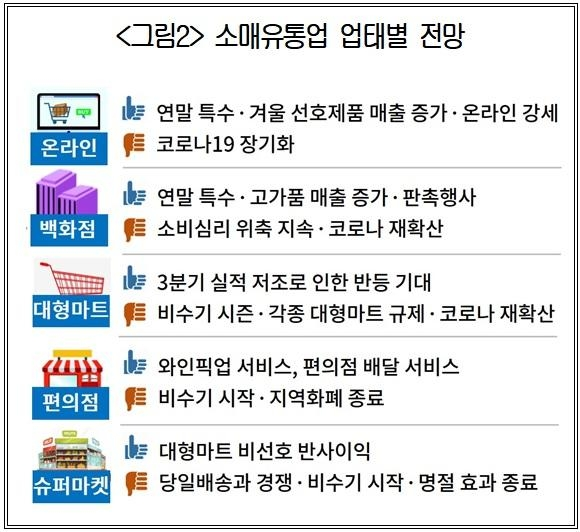
출처: 대한상공회의소

# 온오프라인 유통업체 식품군 전년동기대비 성장률

무점포소매의 급격한 증가를 확인하기 위해 온오프라인 유통업체의 식품군 성장률을 함께 확인하였습니다.

In [ ]:
# https://www.data.go.kr/data/15061361/fileData.do

online_market = pd.read_excel('주요 유통업체 26개사 온오프라인 식품군 월간 전년동기대비 성장률_201601_202008.xlsx')
online_market.set_index('년월', drop=True, inplace=True)

In [ ]:
plt.figure(figsize=(12, 8))

plt.plot(online_market.index[36:], online_market.iloc[36:, 0], label='오프라인 성장률', linewidth=2, marker='o')
plt.plot(online_market.index[36:], online_market.iloc[36:, 1], label='온라인 성장률', linewidth=2, marker='o')
plt.axvline(x=online_market.index[48],linestyle ='--',color='lime')
plt.axhline(y=0, color='k', linewidth=1, linestyle='dashed')

plt.title('오프라인 및 온라인 식품군 전년 동기대비 성장률', fontsize=20)
plt.yticks(fontsize=15)
plt.xticks(rotation=30, fontsize=14)

plt.legend(loc='upper right', fontsize=15)
plt.tight_layout()
plt.show()

2020년 2월 코로나 쇼크로 인해 온라인 유통업체 식품군의 성장률이 크게 증가하였습니다.

또한 오프라인 유통업체 식품군의 성장률은 코로나 쇼크 이후 모두 음수값에 머물러 있는 것을 확인할 수 있었습니다.

# 기간별 해외 입국자 수

해외 입국자 수 데이터와 면세점 판매 지수를 비교합니다.

In [ ]:
# https://know.tour.go.kr/stat/exitEntryTourStatDis.do?enterCode=1

tourist = pd.read_excel('출입국통계_2019_2020.xlsx')
tourist.set_index('국적별', drop=True, inplace=True)
tourist = tourist.T

코로나 이후 해외입국자수가 폭락하면서 면세점 판매량도 폭락한 것을 확인하였습니다.

In [ ]:
fig, ax1 = plt.subplots(figsize=(12, 8))

color1 = 'C0'
ax1.set_ylabel('명 (백만)', color=color1,fontsize=15)
ax1.plot(tourist.index, tourist.sum(axis=1), color=color1, label='해외 입국자 수',marker='o')

ax1.axvline(x=tourist.index[12],linestyle ='--',color='lime')

ax1.legend(bbox_to_anchor=(1, 1), fontsize=15)
ax1.set_title('해외 입국자 수와 면세점 판매지수 비교',fontsize=20)

plt.setp(ax1.get_xticklabels(), rotation=30, ha='right', fontsize=14)
plt.setp(ax1.get_yticklabels(), fontsize=14)

ax2 = ax1.twinx()
ax2.grid(False)

color2 = 'C1'
ax2.set_ylabel('판매지수', color=color2,fontsize=15)
ax2.plot(tourist.index, stores.loc[24:44, '면세점'], color=color2, label='면세점 판매지수',marker='o')
ax2.legend(bbox_to_anchor=(1, 0.94), fontsize=14)
plt.setp(ax2.get_yticklabels(), fontsize=14)

fig.tight_layout()
plt.show()